# Задание 4

# Многомерная регрессия

**Цель лабораторной работы:** изучение принципов решения задачи многомерной регрессии с использованием методов машинного обучения.

## Электроснабжение

Датасет – x12.csv

Набор данных содержит данные от различных государственных органов по электроснабжению.

Атрибуты:

- I – индекс;
- A0 – 1;
- A1 – капитальные затраты;
- A2 – затраты на оплату труда;
- A3 – затраты на электроэнергию;
- B – выработка электроэнергии (в миллионах киловатт).

# 1. Загрузить набор данных как датафрейм библиотеки pandas. Использовать набор данных для задания 4.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x12.csv')
df.head()

,Number,One,CapitalCosts,LaborCosts,EnergyCosts,ElectricalOutput
0,1,1,98.288,0.386,13.219,1.270
1,2,1,255.068,1.179,49.145,4.597
2,3,1,208.904,0.532,18.005,1.985
3,4,1,528.864,1.836,75.639,9.897
4,5,1,307.419,1.136,52.234,5.907


# 2. Получить представлении о наборе данных с помощью методов shape, head, describe, info библиотеки pandas.

In [3]:
df.shape

(16, 6)

In [4]:
df.head()

,Number,One,CapitalCosts,LaborCosts,EnergyCosts,ElectricalOutput
0,1,1,98.288,0.386,13.219,1.270
1,2,1,255.068,1.179,49.145,4.597
2,3,1,208.904,0.532,18.005,1.985
3,4,1,528.864,1.836,75.639,9.897
4,5,1,307.419,1.136,52.234,5.907


In [5]:
df.describe()

,Number,One,CapitalCosts,LaborCosts,EnergyCosts,ElectricalOutput
count,16.000000,16.0,16.000000,16.000000,16.000000,16.000000
mean,8.500000,1.0,357.397438,1.612563,49.187438,4.934687
std,4.760952,0.0,241.640713,1.024993,35.314214,3.294170
min,1.000000,1.0,19.478000,0.115000,1.739000,0.125000
25%,4.750000,1.0,200.369250,1.047000,20.993750,2.175500
50%,8.500000,1.0,292.732500,1.386000,42.634500,4.537000
75%,12.250000,1.0,531.033000,2.427500,75.595500,7.459500
max,16.000000,1.0,946.766000,4.004000,125.351000,10.077000


Получим информацию о датасете

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            16 non-null     int64  
 1   One               16 non-null     int64  
 2   CapitalCosts      16 non-null     float64
 3   LaborCosts        16 non-null     float64
 4   EnergyCosts       16 non-null     float64
 5   ElectricalOutput  16 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 900.0 bytes


Проверим наличие пропущенных значений

In [7]:
print(df.isnull().sum())

Number              0
One                 0
CapitalCosts        0
LaborCosts          0
EnergyCosts         0
ElectricalOutput    0
dtype: int64


# 3. Произвести разведочный анализ данных по датасету – визуализировать данные с помощью библиотек matplotlib, seaborn.

Построим гистограммы

array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': 'One'}>],
       [<Axes: title={'center': 'CapitalCosts'}>,
        <Axes: title={'center': 'LaborCosts'}>],
       [<Axes: title={'center': 'EnergyCosts'}>,
        <Axes: title={'center': 'ElectricalOutput'}>]], dtype=object)

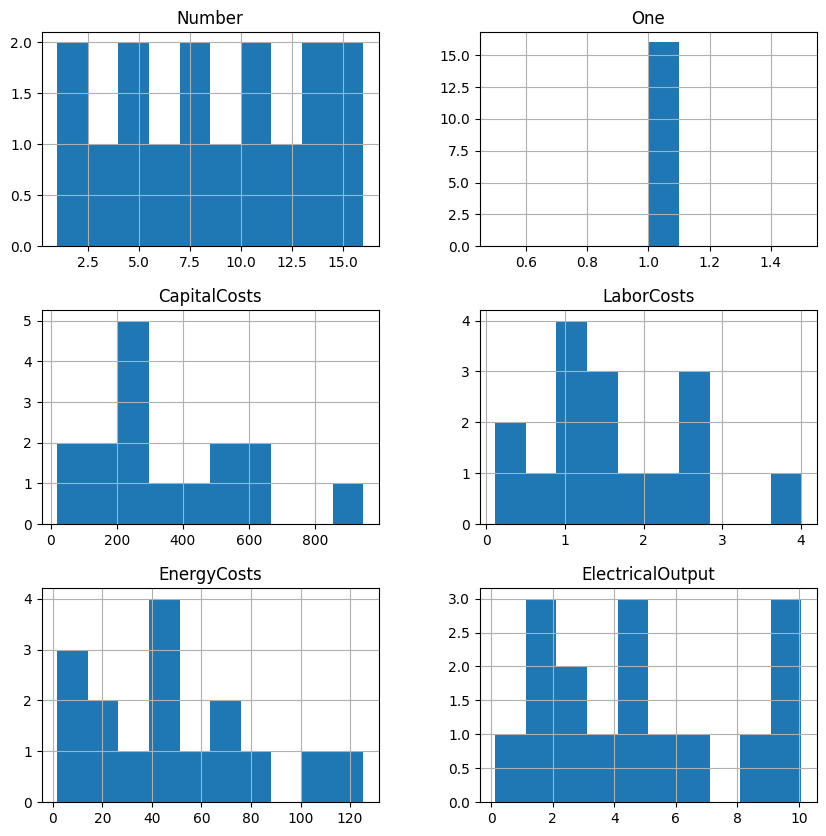

In [8]:
df.hist(figsize=(10, 10))

Построим матрицу корреляции

<Axes: >

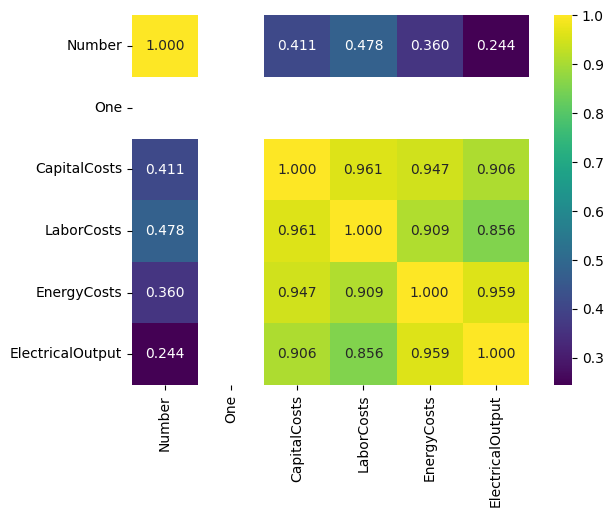

In [9]:
sns.heatmap(df.corr(), cmap=plt.cm.viridis, annot=True, fmt='.3f')

# 4. На основе выполненного анализа данных произвести выводы о влиянии различных признаков на класс.

Признаки Number и One слабо коррелирует с ElectricalOutput и могут быть удалены

# 5. Произвести предобработку данных.

In [10]:
df_copy = df.copy()

Удалим из набора данных признаки, слабо коррелирующие между собой и с
целевой переменной

In [11]:
uncorr_feat = ['Number', 'One']
df_copy.drop(uncorr_feat, axis=1, inplace=True)

Кодировать категориальные признаки в дискретные величины с помощью
методов библиотеки sklearn не требуется т.к. категориальные признаки отсутствуют в датасете

Произведем нормализацию данных с помощью методов библиотеки sklearn.

Разделяем данные на признаки и целевую переменную

In [12]:
y = df_copy['ElectricalOutput']
X = df_copy.drop('ElectricalOutput', axis=1)

Применяем операцию нормализации для численной устойчивости

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,CapitalCosts,LaborCosts,EnergyCosts
0,-1.107459,-1.235900,-1.051929
1,-0.437366,-0.436863,-0.001241
2,-0.634675,-1.088789,-0.911958
3,0.732865,0.225138,0.773599
4,-0.213613,-0.480190,0.089099


# 6. Разбить обработанный набор данных на обучающую и тестовую выборки с помощью методов библиотеки sklearn.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# 7. Произвести обучение модели линейной регрессии (LinearRegression) библиотеки sklearn.

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 8. Отобразить корректность работы модели на тестовой и обучающей выборках с помощью стандартных метрик библиотеки sklearn.

Делаем прогноз на основе данных тестирования

In [17]:
y_pred = model.predict(X_test)
y_pred[:5]

array([ 5.71097577,  2.93546888,  1.02258217, 10.9710369 ])

Корень среднеквадратической ошибки

In [18]:
from sklearn.metrics import root_mean_squared_error

print(f'Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred)}')

Root Mean Squared Error (RMSE): 1.3623120998533156


Коэффицент детерминации R2

In [19]:
from sklearn.metrics import r2_score
print(f'R2: {np.round(r2_score(y_test, y_pred), 2)}')

R2: 0.84


Оценим R-квадрат (метрика score по умолчанию для класса LinearRegression)

In [20]:
model.score(X_test, y_test)

0.8377820733727658

## Итоговое уравнение

Коэффиценты

In [21]:
print(f'Coefficients: {model.coef_}')

Coefficients: [-0.33437886 -1.25953795  4.59845726]


Свободный член

In [22]:
print(f'Intercept: {model.intercept_}')

Intercept: 5.02019148201295


## Визуализация результатов регрессии

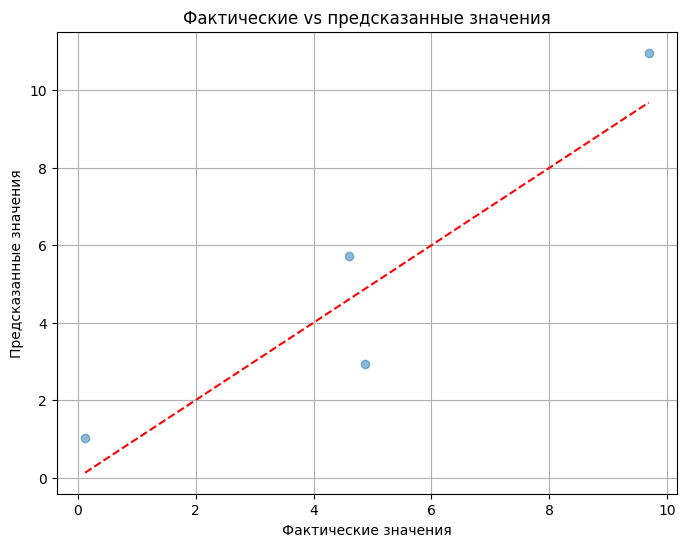

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')

plt.title('Фактические vs предсказанные значения')

plt.grid()

plt.show()

# Остатки регрессии (Residuals Plot)

Остаток – это разница между фактическим и предсказанным значением (y_true - y_pred).
Этот график помогает проверить важное предположение линейной регрессии: что остатки случайны и не имеют паттернов.

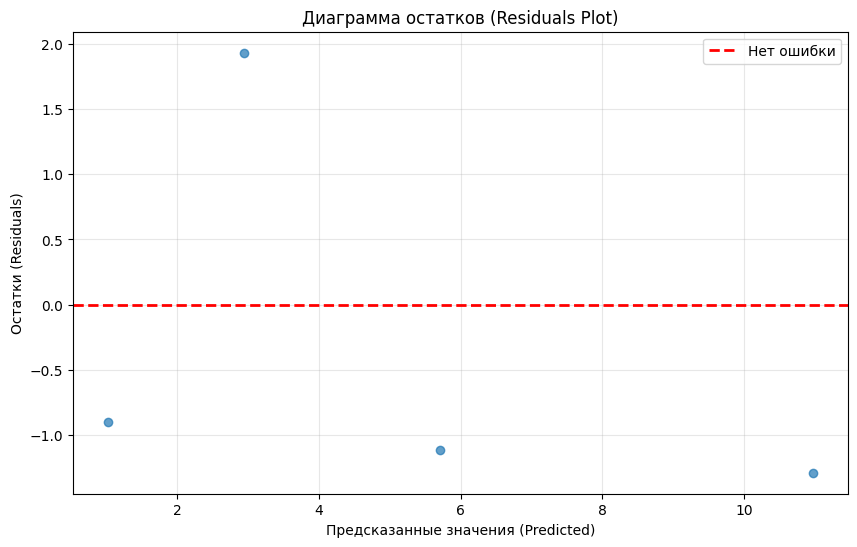

In [25]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')

plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()